In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset =pd.read_csv("D:\\Learnbay\\Stats & ML by Kumar Sundaram Sir\\Documents\\ML\\USA_Housing.csv")
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Data preprocessing Part

### Part 1: Handling Missing Values

In [4]:
dataset.isnull().sum()/len(dataset)*100


Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

## Imputation Method

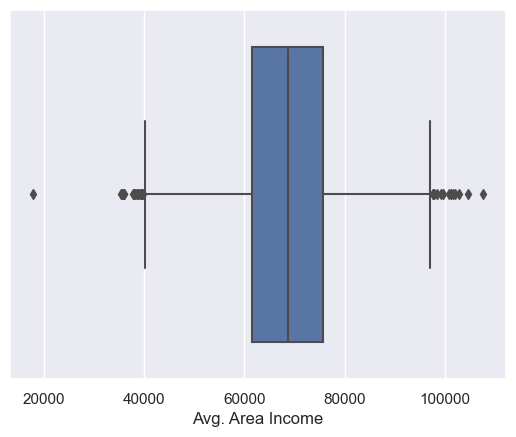

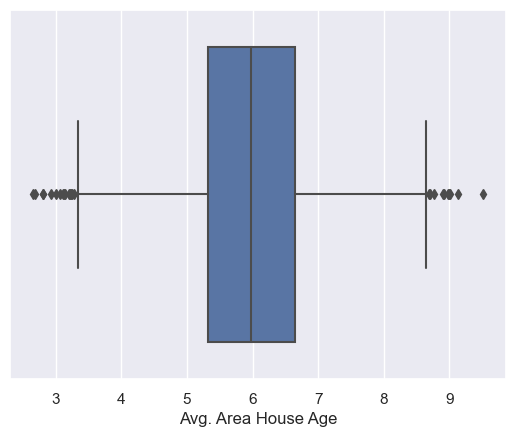

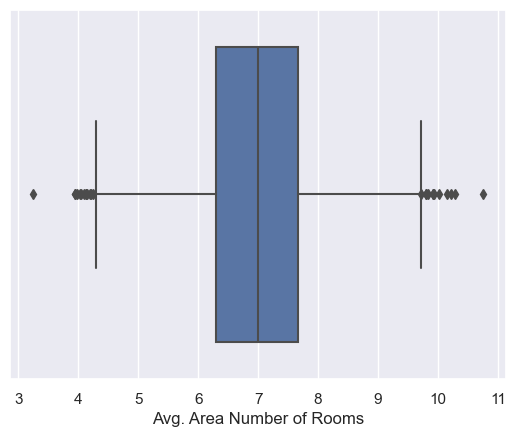

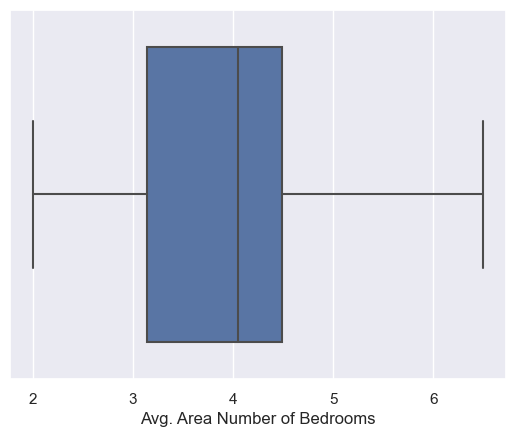

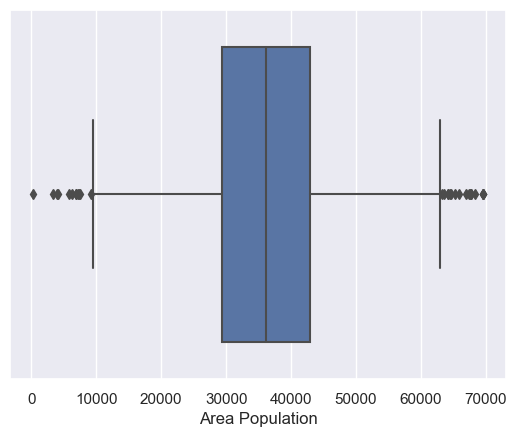

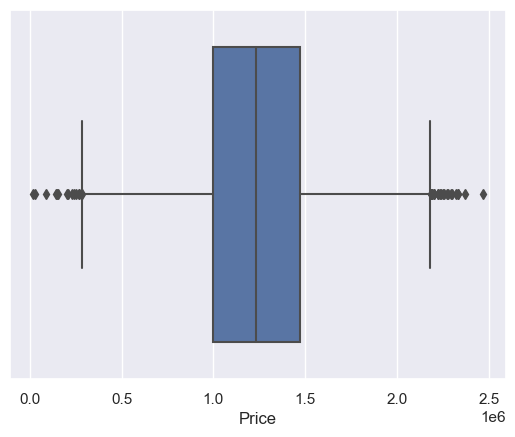

In [5]:
# Check Outlier

def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [6]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
dataset['Avg. Area Income']=dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())

In [8]:
dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].median())

In [9]:
dataset['Avg. Area Number of Bedrooms'] = dataset['Avg. Area Number of Bedrooms'].fillna(dataset['Avg. Area Number of Bedrooms'].mean())

In [10]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

## part 2 :Encoding

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [12]:
dataset['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [13]:
dataset['Address'][1]

'188 Johnson Views Suite 079\nLake Kathleen, CA 48958'

In [14]:
dataset['Address'] = dataset['Address'].astype('category')
dataset['Address'] = dataset['Address'].cat.codes

# Here we are converting the object datatype to categorical and categorical to numerical

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int16  
dtypes: float64(6), int16(1)
memory usage: 244.3 KB


In [16]:
dataset['Address'].nunique()

5000

In [17]:
dataset['Address'][0]

962

In [18]:
dataset['Address'][1]

863

In [19]:
# Whether Address is significant variable or not
# check p-value

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ Address',data = dataset).fit()
anova_result = sm.stats.anova_lm(model,typ = 2)
print(anova_result)


                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


In [20]:
# Address is non significant as it is 53.8 confidence only

In [21]:
dataset = dataset.drop(['Address','Avg. Area Number of Bedrooms'], axis =1)
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


## Part:3 -Outlier Treatment(mandatory for Linear Regression )

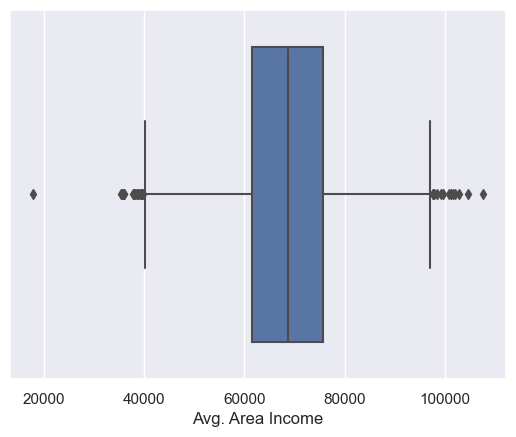

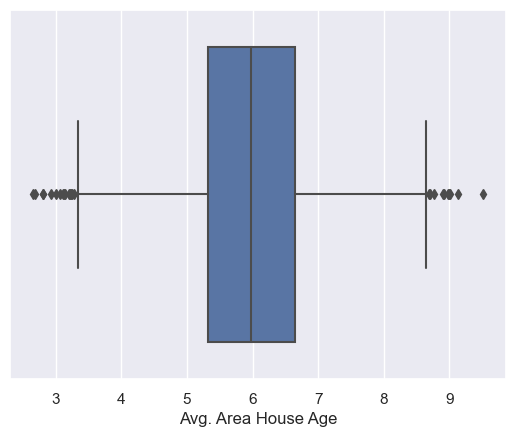

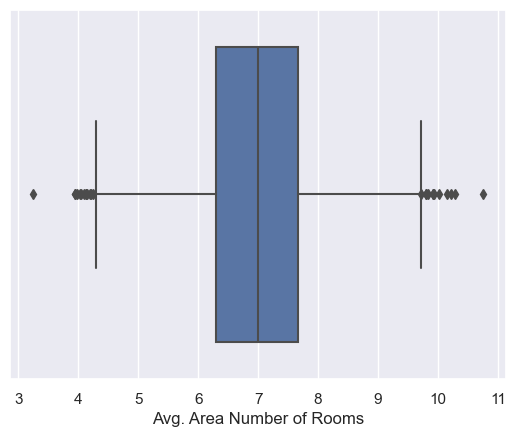

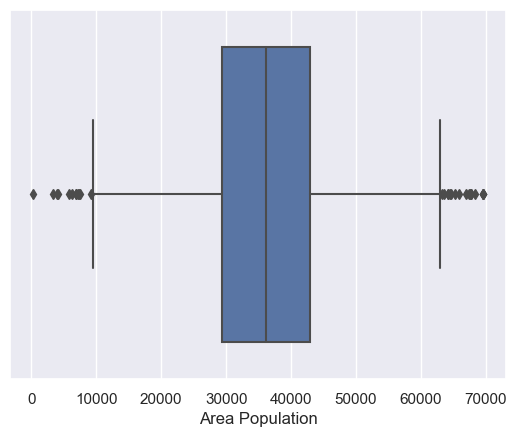

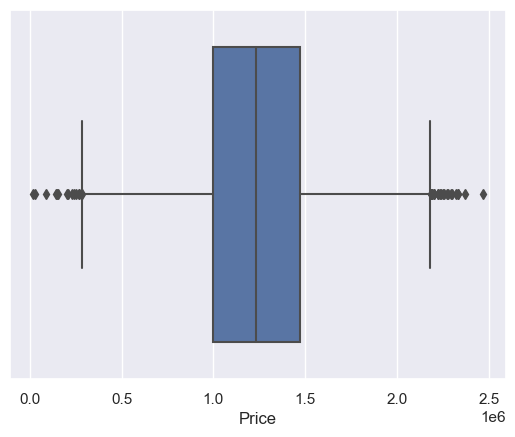

In [22]:
# Check Outlier

def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

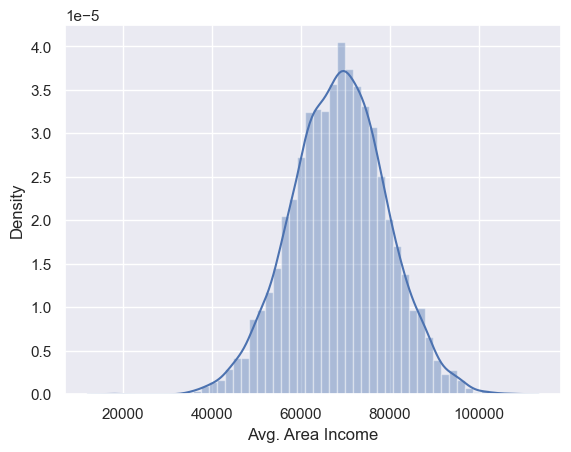

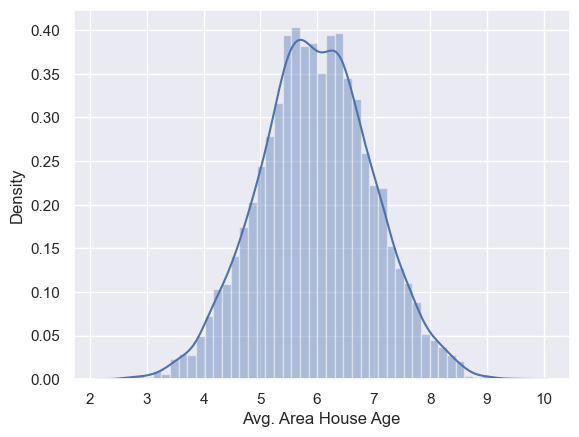

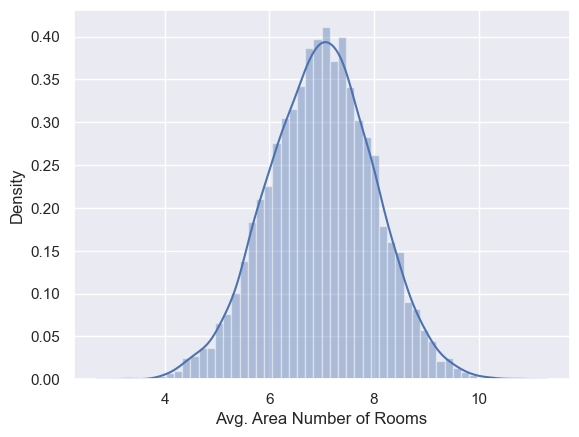

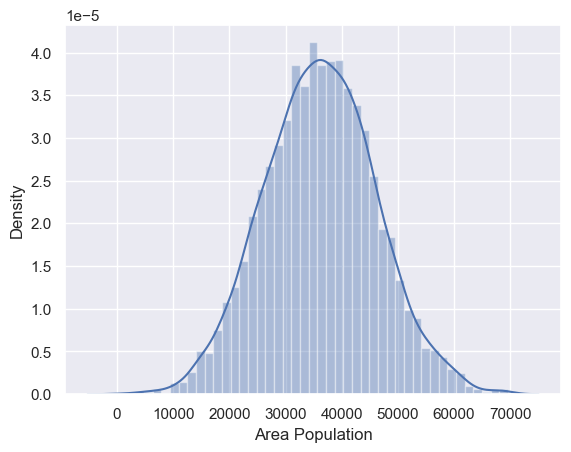

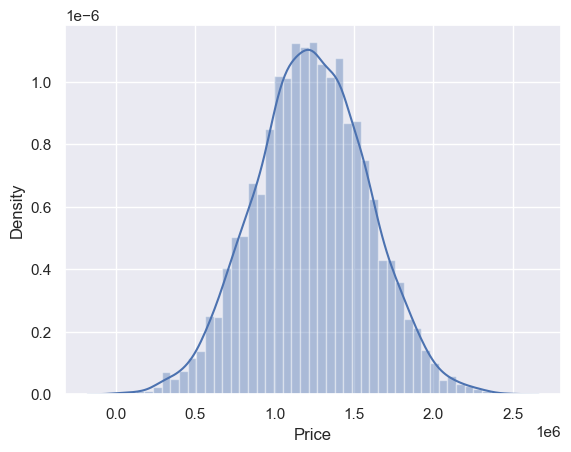

In [23]:
def distplots(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distplots(i)

In [24]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price'],
      dtype='object')

In [25]:
# Outlier Found -['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']

# no need to do work on dependent variable outliers


In [26]:
income_Q1 =dataset['Avg. Area Income'].quantile(0.25)
income_Q3 =dataset['Avg. Area Income'].quantile(0.75)
income_iqr = income_Q3 - income_Q1
upper_income = income_Q3 + (1.5*income_iqr)
lower_income = income_Q1 - (1.5*income_iqr)
print(upper_income)
print(lower_income)

97188.57246750002
40063.096827499976


In [27]:
dataset['Avg. Area Income'] = np.where(dataset['Avg. Area Income'] >upper_income,upper_income,
                            np.where(dataset['Avg. Area Income'] <lower_income,lower_income,
                                              dataset['Avg. Area Income']))

In [28]:
age_Q1 =dataset['Avg. Area House Age'].quantile(0.25)
age_Q3 =dataset['Avg. Area House Age'].quantile(0.75)
age_iqr = age_Q3 - age_Q1
upper_age = age_Q3 + (1.5*age_iqr)
lower_age = age_Q1 - (1.5*age_iqr)
print(upper_age)
print(lower_age)

8.6435966745
3.3294948205


In [29]:
dataset['Avg. Area House Age'] = np.where(dataset['Avg. Area House Age'] >upper_age,upper_age,
                        
                            np.where(dataset['Avg. Area House Age'] <lower_age,lower_age,
                                              dataset['Avg. Area House Age']))

In [30]:
room_Q1 =dataset['Avg. Area Number of Rooms'].quantile(0.25)
room_Q3 =dataset['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_Q3 - room_Q1
upper_room = room_Q3 + (1.5*room_iqr)
lower_room= room_Q1 - (1.5*room_iqr)
print(upper_room)
print(lower_room)

9.713663958875
4.251308213874999


In [31]:
dataset['Avg. Area Number of Rooms'] = np.where(dataset['Avg. Area Number of Rooms'] >upper_room,upper_room,
                                               np.where(dataset['Avg. Area Number of Rooms'] <lower_room,lower_room,
                                              dataset['Avg. Area Number of Rooms']))

In [32]:
pop_Q1 =dataset['Area Population'].quantile(0.25)
pop_Q3 =dataset['Area Population'].quantile(0.75)
pop_iqr = pop_Q3 - pop_Q1
upper_pop= pop_Q3 + (1.5*pop_iqr)
lower_pop= pop_Q1 - (1.5*pop_iqr)
print(upper_pop)
print(lower_pop)

63047.333875
9217.885595000003


In [33]:
dataset['Area Population'] = np.where(dataset['Area Population'] >upper_pop,upper_pop,
                                               np.where(dataset['Area Population'] <lower_pop,lower_pop,
                                              dataset['Area Population']))

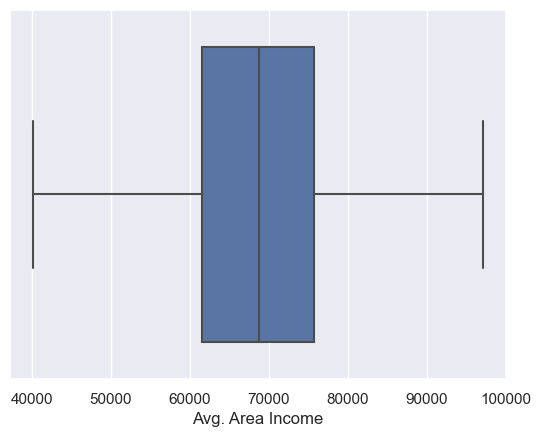

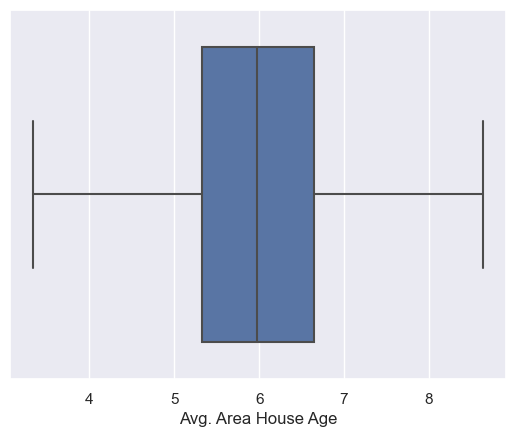

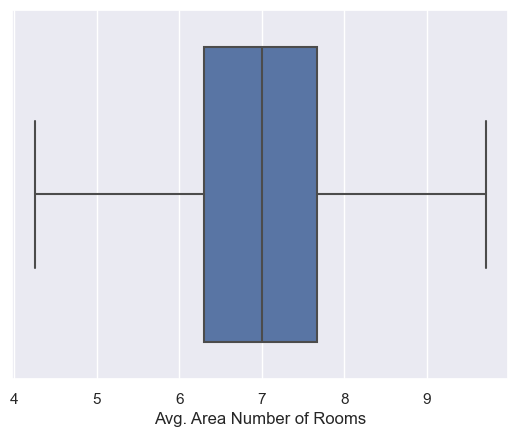

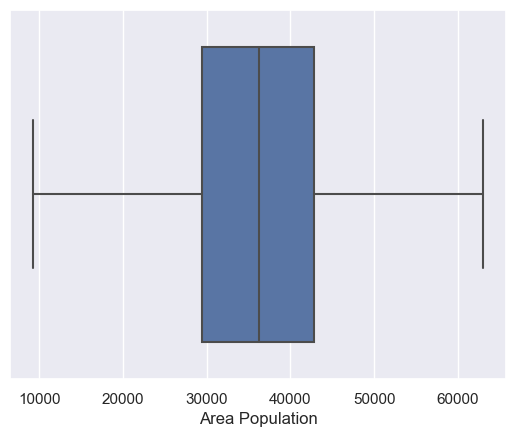

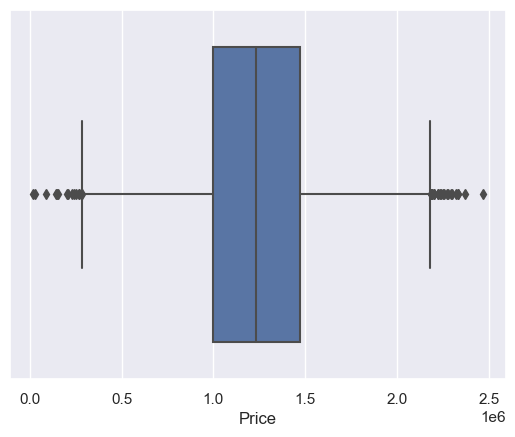

In [34]:
# Check Outlier

def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

## Part4- Feature Scaling

In [35]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68587.479539,5.977490,6.987540,36159.070769,1.232073e+06
std,10574.362055,0.986995,1.001419,9862.221143,3.531176e+05
min,40063.096827,3.329495,4.251308,9217.885595,1.593866e+04
25%,61485.150192,5.322283,6.299692,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,36199.406690,1.232669e+06
75%,75766.519103,6.650808,7.665281,42861.290770,1.471210e+06
max,97188.572468,8.643597,9.713664,63047.333875,2.469066e+06


## For Gradient descent method Feature Scaling is 100% required
## For OLS, we have to check with or without Feature scaling is giving better result

In [36]:
# Split the data into independent and dependent variable

x = dataset.drop(['Price'],axis = 1)
y = dataset['Price']

In [37]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [38]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scaler =scaler.fit_transform(x)

In [40]:
pd.DataFrame(x_scaler).head()

,0,1,2,3
0,1.036382,-0.298541,0.021620,-1.325622
1,1.008309,0.025747,-0.256381,0.407049
2,-0.690457,-0.113082,1.523179,0.073326
3,-0.495800,1.226822,-1.398967,-0.187484
4,-0.813869,-0.949376,0.850726,-0.994293


In [41]:
# Preprocessing Part
# 1) Hanlding Missing values - completed
# 2) Handling Encoding -completed
# 3) Handling Outliers - completed
# 4) Handling Feature Scaling - Completed
# 5) Handling Imbalance -only appicable to classification problem

<function matplotlib.pyplot.show(close=None, block=None)>

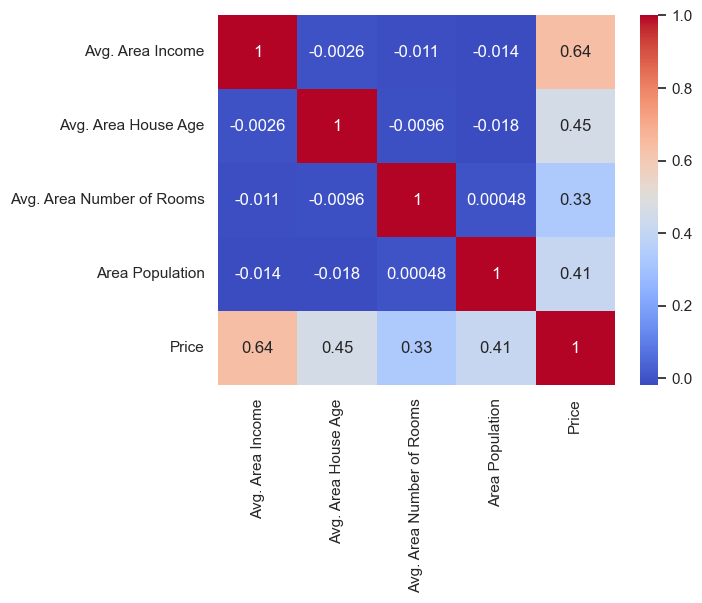

In [42]:
# Heat Map

sns.heatmap(dataset.corr(), annot =True, cmap ='coolwarm')
plt.show

In [43]:
# Correlation between and idv and dv is no where >0.75
# No 2 idv's have same correlation
# it means there is no multicollinearity
# even if we want to check further, we can use Variance Inflation Factor

# Variance Inflation Factor(VIF)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_scaler

vif =pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [45]:
vif

,Variance Inflation Factor,Features
0,1.000335,Avg. Area Income
1,1.000432,Avg. Area House Age
2,1.000214,Avg. Area Number of Rooms
3,1.000537,Area Population


In [46]:
# Check -Duplicate data

dataset.duplicated().sum()

0

## Advance EDA - pandas profiling

In [47]:
# !pip install pandas-profiling

In [48]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file = 'EDA_for_Housing_dataset.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

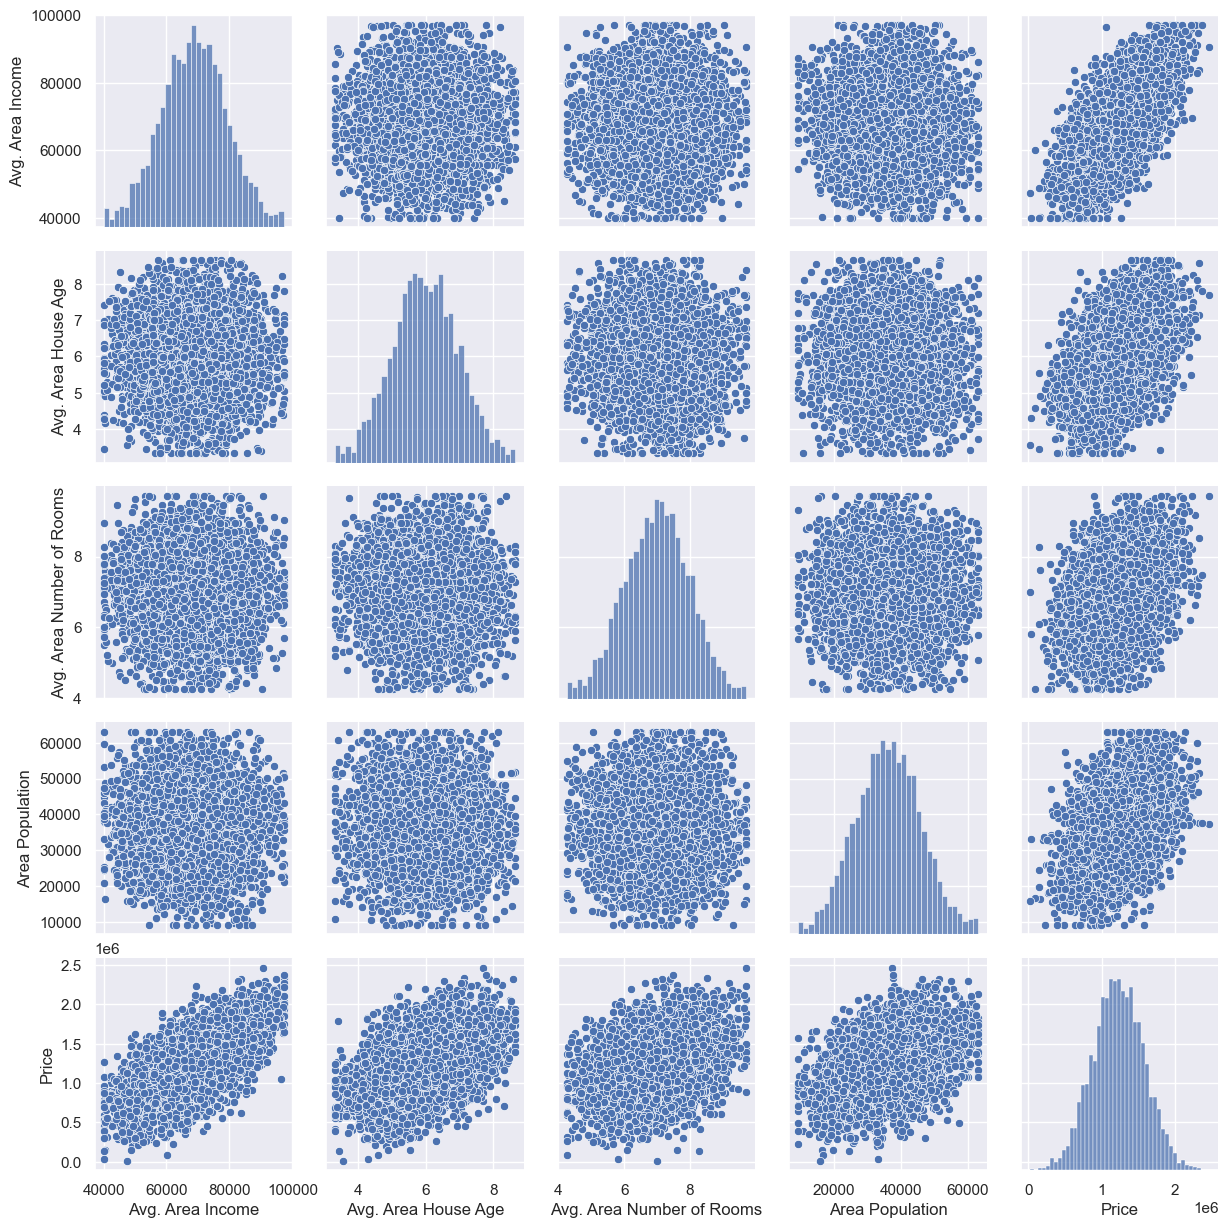

In [49]:
sns.pairplot(dataset)

In [50]:
# Avg Area Number of Bedrooms is not significant as it is not showing any correlation

## Split the data into train and test

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=101)

## Build OLS Model

In [52]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [53]:
regression_model =smf.OLS(endog = y_train, exog=x_train).fit()

In [54]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.331e+04
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                        08:54:17   Log-Likelihood:                         -48368.
No. Observations:                3500   AIC:                                  9.674e+04
Df Residuals:                    3496   BIC:                                  9.677e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.1182      0.325     31.096      0.000       9.480      10.756
Avg. Area House Age        5.019e+04   3622.518     13.856      0.000    4.31e+04    5.73e+04
Avg. Area Number of Rooms -7275.8991   3337.041     -2.180      0.029   -1.38e+04    -733.153
Area Population               8.4384      0.396     21.294      0.000       7.661       9.215
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.580
Skew:                          -0.005   Prob(JB):                        0.748
Kurtosis:                       2.938   Cond. No.                     7.92e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
# Avg. Area Number of Bedrooms -pvalue is greater than >0.05, so we can drop this column

In [1]:
#regression_model1 =smf.OLS(endog = y_test, exog=x_test).fit()

NameError: name 'smf' is not defined

In [57]:
#regression_model1.summary()

In [58]:
# Sklearn linear regression model

from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
print("Training Accuracy",r2_score(y_train,y_pred_train))
print("*************"*5)
print("Testing Accuracy",r2_score(y_test,y_pred_test))

Training Accuracy 0.9158243573875635
*****************************************************************
Testing Accuracy 0.915623326149149


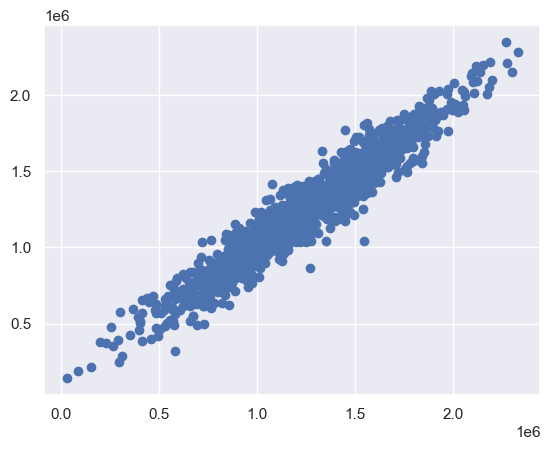

In [62]:
# Linearity

plt.scatter(y_test,y_pred_test)

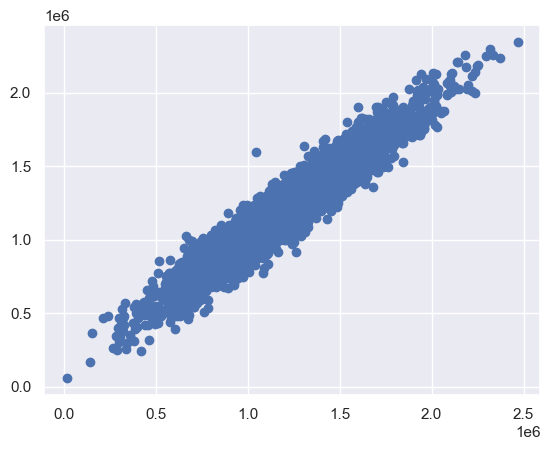

In [63]:
plt.scatter(y_train,y_pred_train)

<AxesSubplot:xlabel='Price', ylabel='Density'>

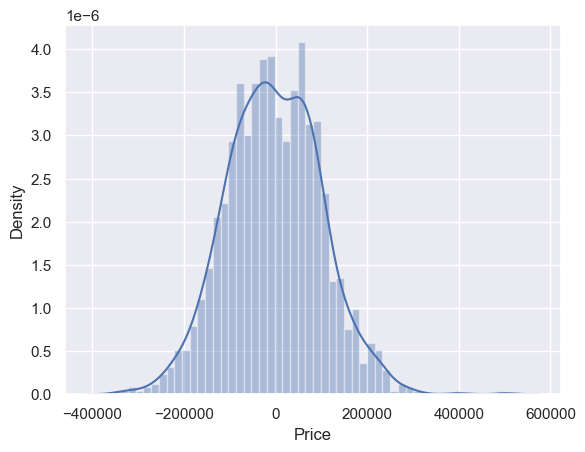

In [64]:
# Residual -normality

sns.distplot((y_test -  y_pred_test),bins=50)

<AxesSubplot:xlabel='Price', ylabel='Density'>

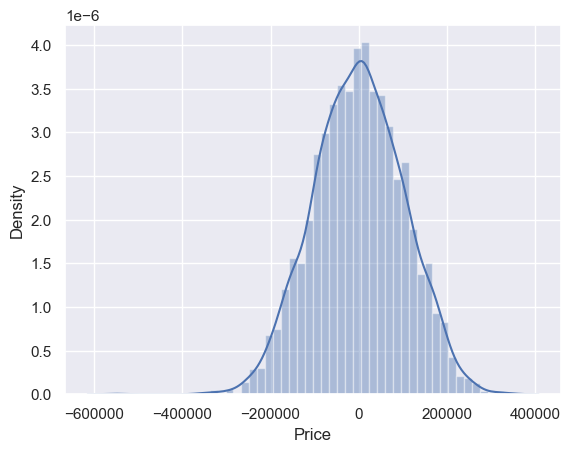

In [65]:
sns.distplot((y_train -  y_pred_train),bins=50)

In [66]:
 # Conclude :

# part 1 : R-Square and Adj-R-Square - satisfied
# part 2 - p_value - satisfied (please drop bedroom and try)
# part 3 - assumption :
    # a) no autocorrelation found - satisfied
    # b ) no multicollinearity found - satisfied
    # c) homoscediscity - satisfied (outlier treatement done)
    # d) normality of residual - satisfied
    # e) linearity relation with action dv vs pred dv - satisfied
    # f) no endogenity - satisfied (as taken right dv - price)

## Measurements of Error

In [67]:
 from sklearn import metrics

In [68]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_test))

MAE : 82288.57794534977


In [69]:
print("MAPE :", metrics.mean_absolute_percentage_error(y_test,y_pred_test)*100)

MAPE : 7.878282819409374


In [71]:
print("MAPE :", np.mean(np.abs((y_test - y_pred_test) / y_test))*100)

MAPE : 7.878282819409361
